# library

In [1]:
from sklearn.tree import DecisionTreeClassifier  # sotring whole algo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#tree #KNN #Log #GAussinab #Rf #SVC #SVM
from sys import argv
from sklearn import metrics
import numpy as np   # array
import pandas as pd  # read + plot
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix #report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder #convert data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from imblearn.over_sampling import ADASYN, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss, EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from imblearn.datasets import make_imbalance
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier



In [2]:
#traditional model
lr= LogisticRegression(random_state=100,penalty='l2',solver='lbfgs',multi_class="ovr")
rf= RandomForestClassifier(n_estimators=100,criterion='entropy',max_features="sqrt",random_state=140)
svc = SVC(kernel='poly', degree = 3)
#svm = svm.SVC(kernel='linear', C=1)
ridge=RidgeClassifier()
ada=AdaBoostClassifier()
sgd=SGDClassifier()
ex=ExtraTreesClassifier(n_estimators=100, random_state=10)
la=LinearDiscriminantAnalysis()
lsv=LinearSVC()
dt=DecisionTreeClassifier(max_depth=10,criterion='gini',min_samples_split=10)
mlp= MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100,alpha=0.0001,learning_rate='invscaling')
knn= KNeighborsClassifier(n_neighbors=100,metric='manhattan',weights='distance',algorithm="kd_tree")
lgbm = LGBMClassifier(num_leaves=150, max_depth=100, learning_rate=0.1, n_estimators=100, subsample=1.0,colsample_bytree=1.0, reg_alpha=30, reg_lambda=10)
xgb = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, reg_alpha=30, reg_lambda=30, gamma=0, min_child_weight=1)

#VOTING (HARD+SOFT)
from sklearn.ensemble import  VotingClassifier
vth1 = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt),('mlp',mlp)], voting='soft')
vth2 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn), ('dt', dt)], voting='soft')
vth3 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], voting='soft')
vth4 = VotingClassifier(estimators=[ ('lgbm', lgbm),('rf',rf)], voting='hard')
vth5 = VotingClassifier(estimators=[ ('lgbm', lgbm),('knn',knn)], voting='hard')
vth6 = VotingClassifier(estimators=[ ('lgbm', lgbm),('dt',dt)], voting='hard')
vth7 = VotingClassifier(estimators=[ ('lgbm', lgbm),('mlp',mlp)], voting='hard')
vth8 = VotingClassifier(estimators=[ ('dt', dt),('xgb', xgb)], voting='hard')
vth9 = VotingClassifier(estimators=[ ('dt', dt),('mlp', mlp),('xgb', xgb),('lgbm', lgbm),('ex', ex),('knn', knn)], voting='hard')
vth10 = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt),('mlp',mlp)], voting='hard')
vth11 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn), ('dt', dt)], voting='hard')
vth12 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], voting='hard')
vth13 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm),('rf',rf)], voting='hard')


#STACKING
from sklearn.ensemble import StackingClassifier
stk1 = StackingClassifier(estimators=[('lgbm', lgbm),('xgb',xgb)], final_estimator=LogisticRegression())
stk2 = StackingClassifier(estimators=[('dt',dt),('knn', knn)], final_estimator=LogisticRegression())
stk3 = StackingClassifier(estimators=[('xgb',rf),('knn', knn)], final_estimator=LogisticRegression())
stk4 = StackingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], final_estimator=LogisticRegression())
stk5 = StackingClassifier(estimators=[('xgb', xgb), ('mlp', mlp), ('dt', dt),('lgbm',lgbm)], final_estimator=LogisticRegression())
stk6 = StackingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('ex', ex)], final_estimator=LogisticRegression())
stk7 = StackingClassifier(estimators=[('lgbm', lgbm),('xgb',xgb)], final_estimator=RandomForestClassifier())
#stk8 = StackingClassifier(estimators=[('dt',dt),('knn', knn)], final_estimator=RandomForestClassifier())
stk9 = StackingClassifier(estimators=[('xgb',rf),('knn', knn)], final_estimator=RandomForestClassifier())
stk10 = StackingClassifier(estimators=[('lgbm', lgbm),('xgb',xgb), ('rf', rf), ('lr', lr), ('mlp', mlp),], final_estimator=LogisticRegression())
stk11 = StackingClassifier(estimators=[('dt',dt),('knn', knn), ('rf', rf), ('mlp', mlp), ('lgbm', lgbm),], final_estimator=LogisticRegression())
stk12 = StackingClassifier(estimators=[('xgb',rf),('knn', knn), ('rf', rf), ('dt', dt), ('ex', ex),], final_estimator=LogisticRegression())

model_list = [ex,lr,rf,svc,knn,ada,dt,lgbm,xgb,mlp,vth1,vth2,vth3,vth4,vth5,vth6,vth7,vth8,vth9,vth10,vth11,vth12,vth13,stk1,stk2,stk3,stk4,stk5,stk6,stk7,stk9,stk10,stk11,stk12]

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, matthews_corrcoef, cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    matthews_corrcoef,
    cohen_kappa_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Train file 3 test file 1

In [ ]:
#------------------------------TRAIN file ALLL
#---------------------------------------------------------------------
#--------------------------------RECSNO

df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc---rec.csv')
df2_recLT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')
df3_recFT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_REC.csv')


#----------------------------REVIEW file---
df1_REVDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/Doc_REV.csv')
df2_REVLT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/LSA_Rev.csv')
df3_REVFT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_REVIEW .csv')

#----------------------------------DBSNO file

df1_DBSNODT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc2---dbs.csv')
df2_DBSNOLT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lsa--dbs.csv')
df3_DBSNOFT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/Fastext_DBSNO.csv')




#-----------TESTING FILE FOR ALLL---------------------------

tdf1 = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/d2vtetssss.csv')
tdf2= pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/LSAtest.csv')
tdf3 = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_TESTING file.csv')

In [ ]:
tdf1 = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/d2vtetssss.csv')
tdf2= pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/LSAtest.csv')
tdf3 = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_TESTING file.csv')

In [ ]:
df1_recDT.shape

(5967, 129)

In [ ]:
df1_recDT['Target'].value_counts()

1    3277
0    2690
Name: Target, dtype: int64

In [ ]:
X1 = df1_recDT.drop("Target", axis=1)
y1 = df1_recDT['Target']
smote = SMOTE(random_state=42)
X1_resampled_smote, y1_resampled_smote = smote.fit_resample(X1, y1)
smote_balanced1= pd.concat([X1_resampled_smote, y1_resampled_smote], axis=1)
smote_balanced1= pd.concat([X1_resampled_smote, y1_resampled_smote], axis=1)

# REC file all

In [ ]:
X_train1 = df1_recDT.drop('Target', axis=1)
y_train1 = df1_recDT['Target']


X_train2 = df2_recLT.drop('Target', axis=1)
y_train2 = df2_recLT['Target']

X_train3 = df3_recFT.drop('Target', axis=1)
y_train3 = df3_recFT['Target']

#----------------------------------------------------------
X_test1 = tdf1.drop('Target', axis=1)
y_test1 = tdf1['Target']

X_test2 = tdf2.drop('Target', axis=1)
y_test2 = tdf2['Target']

X_test3 = tdf3.drop('Target', axis=1)
y_test3 = tdf3['Target']
#--------------------------

In [ ]:
smote_balanced1['Target'].value_counts()

0    3277
1    3277
Name: Target, dtype: int64

# model

In [ ]:
pip install tensorflow


In [ ]:
!pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc---rec.csv')

# Assuming 'target_column' is the name of your target variable column
# Replace 'target_column' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Use train_test_split to split the data into training and testing sets
# Adjust the test_size parameter to set the proportion of the dataset used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test that you can use for training and testing your model


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, reg_alpha=30, reg_lambda=30, gamma=0, min_child_weight=1)

# Initialize the StratifiedKFold with 5 folds
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model's performance (you can use different metrics as needed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

# Optionally, you can train the final model on the entire dataset
# xgb_model.fit(X, y)


Accuracy: 0.6917922948073701
Accuracy: 0.6750418760469011
Accuracy: 0.7068676716917923
Accuracy: 0.7018425460636516
Accuracy: 0.7319932998324958
Accuracy: 0.7051926298157454
Accuracy: 0.7185929648241206
Accuracy: 0.7315436241610739
Accuracy: 0.6946308724832215
Accuracy: 0.7214765100671141


# **REC_LSA_ all model**

# CV

## xgb

In [ ]:

import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT.Target  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

xgb_model =XGBClassifier(n_estimators=1000, max_depth=1000, learning_rate=0.1 )

y_pred = cross_val_predict(xgb_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(xgb_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_pred)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

#Sensitivity, specificity, AUC, MCC, and accuracy
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')




Confusion Matrix:
[[1758  932]
 [ 407 2870]]
Accuracy: 0.7756
MCC: 0.5478
AUC: 0.7647
Sensitivity: 0.6535
Specificity: 0.8758


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=1000, max_depth=1000, learning_rate=0.1 )

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[1, 0], cm[0, 1]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.8859, Specificity=0.6477, AUC=0.8599, MCC=0.5556, Accuracy=0.7806
Fold 10: Sensitivity=0.8896, Specificity=0.6298, AUC=0.8597, MCC=0.5401, Accuracy=0.7638
Fold 10: Sensitivity=0.8370, Specificity=0.6403, AUC=0.8299, MCC=0.4892, Accuracy=0.7454
Fold 10: Sensitivity=0.8549, Specificity=0.6117, AUC=0.8249, MCC=0.4848, Accuracy=0.7437
Fold 10: Sensitivity=0.8635, Specificity=0.7077, AUC=0.8674, MCC=0.5820, Accuracy=0.7956
Fold 10: Sensitivity=0.8599, Specificity=0.6572, AUC=0.8586, MCC=0.5306, Accuracy=0.7638
Fold 10: Sensitivity=0.8622, Specificity=0.6523, AUC=0.8380, MCC=0.5310, Accuracy=0.7722
Fold 10: Sensitivity=0.8758, Specificity=0.6414, AUC=0.8626, MCC=0.5337, Accuracy=0.7617
Fold 10: Sensitivity=0.8820, Specificity=0.7043, AUC=0.8724, MCC=0.6011, Accuracy=0.8054
Fold 10: Sensitivity=0.9045, Specificity=0.6542, AUC=0.8557, MCC=0.5871, Accuracy=0.8037

Average Sensitivity: 0.8715
Average Specificity: 0.6547
Average AUC: 0.8529
Average MCC: 0.5435
Average Accur

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=1000, max_depth=1000, learning_rate=0.1 )

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[1, 0], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.8859, Specificity=0.6477, AUC=0.8599, MCC=0.5556, Accuracy=0.7806
Fold 10: Sensitivity=0.8896, Specificity=0.6298, AUC=0.8597, MCC=0.5401, Accuracy=0.7638
Fold 10: Sensitivity=0.8370, Specificity=0.6403, AUC=0.8299, MCC=0.4892, Accuracy=0.7454
Fold 10: Sensitivity=0.8549, Specificity=0.6117, AUC=0.8249, MCC=0.4848, Accuracy=0.7437
Fold 10: Sensitivity=0.8635, Specificity=0.7077, AUC=0.8674, MCC=0.5820, Accuracy=0.7956
Fold 10: Sensitivity=0.8599, Specificity=0.6572, AUC=0.8586, MCC=0.5306, Accuracy=0.7638
Fold 10: Sensitivity=0.8622, Specificity=0.6523, AUC=0.8380, MCC=0.5310, Accuracy=0.7722
Fold 10: Sensitivity=0.8758, Specificity=0.6414, AUC=0.8626, MCC=0.5337, Accuracy=0.7617
Fold 10: Sensitivity=0.8820, Specificity=0.7043, AUC=0.8724, MCC=0.6011, Accuracy=0.8054
Fold 10: Sensitivity=0.9045, Specificity=0.6542, AUC=0.8557, MCC=0.5871, Accuracy=0.8037

Average Sensitivity: 0.8715
Average Specificity: 0.6547
Average AUC: 0.8529
Average MCC: 0.5435
Average Accur

## CNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)



# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build the 1D CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test data
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, y_pred_probs)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {np.mean(all_sensitivity):.4f}')
print(f'Average Specificity: {np.mean(all_specificity):.4f}')
print(f'Average AUC: {np.mean(all_auc):.4f}')
print(f'Average MCC: {np.mean(all_mcc):.4f}')
print(f'Average Accuracy: {np.mean(all_accuracy):.4f}')


19/19 [==============================] - 0s 5ms/step
Fold 10: Sensitivity=0.7568, Specificity=0.6591, AUC=0.7801, MCC=0.4175, Accuracy=0.7136
19/19 [==============================] - 0s 5ms/step
Fold 10: Sensitivity=0.6851, Specificity=0.6505, AUC=0.7396, MCC=0.3358, Accuracy=0.6683
19/19 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.7868, Specificity=0.6619, AUC=0.7884, MCC=0.4532, Accuracy=0.7286
19/19 [==============================] - 0s 4ms/step
Fold 10: Sensitivity=0.7901, Specificity=0.6264, AUC=0.7852, MCC=0.4235, Accuracy=0.7152
19/19 [==============================] - 0s 5ms/step
Fold 10: Sensitivity=0.6024, Specificity=0.7192, AUC=0.7328, MCC=0.3198, Accuracy=0.6533
19/19 [==============================] - 0s 6ms/step
Fold 10: Sensitivity=0.7229, Specificity=0.6466, AUC=0.7815, MCC=0.3708, Accuracy=0.6868
19/19 [==============================] - 0s 6ms/step
Fold 10: Sensitivity=0.8035, Specificity=0.4766, AUC=0.7059, MCC=0.2980, Accuracy=0.6633
19/19 

## EX

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
ex_model = ExtraTreesClassifier()

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    ex_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ex_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, ex_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.9309, Specificity=0.4773, AUC=0.8131, MCC=0.4685, Accuracy=0.7303
Fold 10: Sensitivity=0.9448, Specificity=0.4152, AUC=0.7961, MCC=0.4279, Accuracy=0.6884
Fold 10: Sensitivity=0.8934, Specificity=0.5000, AUC=0.7900, MCC=0.4326, Accuracy=0.7102
Fold 10: Sensitivity=0.9105, Specificity=0.4432, AUC=0.7680, MCC=0.4063, Accuracy=0.6968
Fold 10: Sensitivity=0.9021, Specificity=0.5077, AUC=0.8008, MCC=0.4543, Accuracy=0.7303
Fold 10: Sensitivity=0.9140, Specificity=0.4488, AUC=0.7883, MCC=0.4140, Accuracy=0.6935
Fold 10: Sensitivity=0.8944, Specificity=0.5312, AUC=0.7926, MCC=0.4652, Accuracy=0.7387
Fold 10: Sensitivity=0.9216, Specificity=0.4517, AUC=0.7873, MCC=0.4253, Accuracy=0.6930
Fold 10: Sensitivity=0.9115, Specificity=0.4903, AUC=0.8014, MCC=0.4527, Accuracy=0.7299
Fold 10: Sensitivity=0.8989, Specificity=0.4833, AUC=0.7814, MCC=0.4301, Accuracy=0.7315

Average Sensitivity: 0.9122
Average Specificity: 0.4749
Average AUC: 0.7919
Average MCC: 0.4377
Average Accur

## MLP

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
mlp_model = MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100,alpha=0.0001,learning_rate='invscaling')

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    mlp_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = mlp_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.7357, Specificity=0.6326, AUC=0.7689, MCC=0.3698, Accuracy=0.6901
Fold 10: Sensitivity=0.7890, Specificity=0.7059, AUC=0.8197, MCC=0.4970, Accuracy=0.7487
Fold 10: Sensitivity=0.7273, Specificity=0.7086, AUC=0.7960, MCC=0.4354, Accuracy=0.7186
Fold 10: Sensitivity=0.8056, Specificity=0.6996, AUC=0.8382, MCC=0.5090, Accuracy=0.7571
Fold 10: Sensitivity=0.7537, Specificity=0.7000, AUC=0.8003, MCC=0.4528, Accuracy=0.7303
Fold 10: Sensitivity=0.7611, Specificity=0.6749, AUC=0.8030, MCC=0.4381, Accuracy=0.7203
Fold 10: Sensitivity=0.7390, Specificity=0.6562, AUC=0.7760, MCC=0.3951, Accuracy=0.7035
Fold 10: Sensitivity=0.7222, Specificity=0.6414, AUC=0.7642, MCC=0.3650, Accuracy=0.6829
Fold 10: Sensitivity=0.7552, Specificity=0.6654, AUC=0.7914, MCC=0.4211, Accuracy=0.7164
Fold 10: Sensitivity=0.7303, Specificity=0.6792, AUC=0.7881, MCC=0.4052, Accuracy=0.7097

Average Sensitivity: 0.7519
Average Specificity: 0.6764
Average AUC: 0.7946
Average MCC: 0.4288
Average Accur

## AdaBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators= 100)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    adaboost_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = adaboost_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, adaboost_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.7387, Specificity=0.4924, AUC=0.6645, MCC=0.2387, Accuracy=0.6298
Fold 10: Sensitivity=0.7630, Specificity=0.4325, AUC=0.6316, MCC=0.2075, Accuracy=0.6030
Fold 10: Sensitivity=0.7085, Specificity=0.4748, AUC=0.6198, MCC=0.1887, Accuracy=0.5997
Fold 10: Sensitivity=0.6883, Specificity=0.4066, AUC=0.5630, MCC=0.0988, Accuracy=0.5595
Fold 10: Sensitivity=0.7122, Specificity=0.4538, AUC=0.6418, MCC=0.1715, Accuracy=0.5997
Fold 10: Sensitivity=0.6943, Specificity=0.4947, AUC=0.6408, MCC=0.1930, Accuracy=0.5997
Fold 10: Sensitivity=0.7155, Specificity=0.4219, AUC=0.6177, MCC=0.1432, Accuracy=0.5896
Fold 10: Sensitivity=0.7712, Specificity=0.4759, AUC=0.6516, MCC=0.2591, Accuracy=0.6275
Fold 10: Sensitivity=0.7139, Specificity=0.4786, AUC=0.6508, MCC=0.1975, Accuracy=0.6124
Fold 10: Sensitivity=0.6910, Specificity=0.4667, AUC=0.6277, MCC=0.1600, Accuracy=0.6007

Average Sensitivity: 0.7197
Average Specificity: 0.4598
Average AUC: 0.6309
Average MCC: 0.1858
Average Accur

## LGBM

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
lgbm_model = LGBMClassifier(num_leaves=150, max_depth=1000, learning_rate=0.1, n_estimators=1000)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    lgbm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lgbm_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
lgbm_model = LGBMClassifier(num_leaves=150, max_depth=1000, learning_rate=0.1, n_estimators=1000)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    lgbm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lgbm_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## KNN

In [ ]:

import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT.Target  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

model =KNeighborsClassifier(n_neighbors=10,metric='manhattan',weights='distance',algorithm="kd_tree")

y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_pred)
sensitivity = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
specificity = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')




Confusion Matrix:
[[2066  624]
 [ 137 3140]]
Accuracy: 0.8725
MCC: 0.7488
AUC: 0.8631
Sensitivity: 0.7680
Specificity: 0.9582


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
knn_model = KNeighborsClassifier(n_neighbors=10,metric='manhattan',weights='distance',algorithm="kd_tree")

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.9730, Specificity=0.7576, AUC=0.9580, MCC=0.7606, Accuracy=0.8777
Fold 10: Sensitivity=0.9740, Specificity=0.8131, AUC=0.9686, MCC=0.8007, Accuracy=0.8961
Fold 10: Sensitivity=0.9655, Specificity=0.7374, AUC=0.9520, MCC=0.7297, Accuracy=0.8593
Fold 10: Sensitivity=0.9630, Specificity=0.7509, AUC=0.9520, MCC=0.7394, Accuracy=0.8660
Fold 10: Sensitivity=0.9644, Specificity=0.7962, AUC=0.9548, MCC=0.7825, Accuracy=0.8911
Fold 10: Sensitivity=0.9395, Specificity=0.7703, AUC=0.9525, MCC=0.7244, Accuracy=0.8593
Fold 10: Sensitivity=0.9472, Specificity=0.8086, AUC=0.9572, MCC=0.7719, Accuracy=0.8878
Fold 10: Sensitivity=0.9641, Specificity=0.7448, AUC=0.9464, MCC=0.7296, Accuracy=0.8574
Fold 10: Sensitivity=0.9558, Specificity=0.7354, AUC=0.9335, MCC=0.7214, Accuracy=0.8607
Fold 10: Sensitivity=0.9410, Specificity=0.7625, AUC=0.9423, MCC=0.7272, Accuracy=0.8691

Average Sensitivity: 0.9587
Average Specificity: 0.7677
Average AUC: 0.9517
Average MCC: 0.7487
Average Accur

proposed model is KNN and CV + Test method is here

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance', algorithm="kd_tree")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,shuffle=True)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True positive, true negative, false positive, false negative
tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

# Sensitivity, specificity, AUC, MCC, and accuracy
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the metrics for the single split
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'AUC: {auc:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'Accuracy: {accuracy:.4f}')


Sensitivity: 0.9730
Specificity: 0.7576
AUC: 0.9580
MCC: 0.7606
Accuracy: 0.8777


## catboost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss', eval_metric='AUC', random_seed=42)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

    # Make predictions on the test data
    y_pred = catboost_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.9069, Specificity=0.6894, AUC=0.8946, MCC=0.6182, Accuracy=0.8107
Fold 10: Sensitivity=0.9253, Specificity=0.6367, AUC=0.8903, MCC=0.5901, Accuracy=0.7856
Fold 10: Sensitivity=0.8871, Specificity=0.6619, AUC=0.8593, MCC=0.5677, Accuracy=0.7822
Fold 10: Sensitivity=0.9105, Specificity=0.6154, AUC=0.8761, MCC=0.5572, Accuracy=0.7755
Fold 10: Sensitivity=0.8783, Specificity=0.7000, AUC=0.8783, MCC=0.5928, Accuracy=0.8007
Fold 10: Sensitivity=0.8981, Specificity=0.6502, AUC=0.8809, MCC=0.5697, Accuracy=0.7806
Fold 10: Sensitivity=0.8592, Specificity=0.6797, AUC=0.8635, MCC=0.5519, Accuracy=0.7822
Fold 10: Sensitivity=0.8987, Specificity=0.6586, AUC=0.8744, MCC=0.5762, Accuracy=0.7819
Fold 10: Sensitivity=0.9115, Specificity=0.6693, AUC=0.8988, MCC=0.6076, Accuracy=0.8070
Fold 10: Sensitivity=0.9298, Specificity=0.6708, AUC=0.8827, MCC=0.6357, Accuracy=0.8255

Average Sensitivity: 0.9006
Average Specificity: 0.6632
Average AUC: 0.8799
Average MCC: 0.5867
Average Accur

# LAZY

In [ ]:
!python -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install lazypredict

In [ ]:


import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a dataset (X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
#kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create a LazyClassifier
clf = LazyClassifier()

# Fit and predict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)
results_df = pd.DataFrame(models)
results_df.to_csv('a.csv', index=False)

 97%|█████████▋| 28/29 [00:54<00:01,  1.86s/it]

[LightGBM] [Info] Number of positive: 2636, number of negative: 2137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552273 -> initscore=0.209860
[LightGBM] [Info] Start training from score 0.209860


100%|██████████| 29/29 [00:55<00:00,  1.92s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.87               0.86     0.86      0.87   
LGBMClassifier                     0.74               0.73     0.73      0.74   
XGBClassifier                      0.73               0.72     0.72      0.72   
RandomForestClassifier             0.72               0.71     0.71      0.71   
NuSVC                              0.71               0.71     0.71      0.71   
ExtraTreesClassifier               0.70               0.69     0.69      0.68   
SVC                                0.64               0.61     0.61      0.60   
BaggingClassifier                  0.61               0.61     0.61      0.61   
AdaBoostClassifier                 0.60               0.58     0.58      0.58   
DecisionTreeClassifier             0.57               0.57     0.57      0.57   
ExtraTreeClassifier         

# ROC curve and PR curve

0:	total: 276ms	remaining: 2m 17s
1:	total: 535ms	remaining: 2m 13s
2:	total: 798ms	remaining: 2m 12s
3:	total: 1.06s	remaining: 2m 11s
4:	total: 1.33s	remaining: 2m 11s
5:	total: 1.58s	remaining: 2m 10s
6:	total: 1.85s	remaining: 2m 10s
7:	total: 2.12s	remaining: 2m 10s
8:	total: 2.41s	remaining: 2m 11s
9:	total: 2.67s	remaining: 2m 11s
10:	total: 2.93s	remaining: 2m 10s
11:	total: 3.19s	remaining: 2m 9s
12:	total: 3.45s	remaining: 2m 9s
13:	total: 3.7s	remaining: 2m 8s
14:	total: 3.96s	remaining: 2m 8s
15:	total: 4.35s	remaining: 2m 11s
16:	total: 4.83s	remaining: 2m 17s
17:	total: 5.35s	remaining: 2m 23s
18:	total: 5.79s	remaining: 2m 26s
19:	total: 6.3s	remaining: 2m 31s
20:	total: 6.81s	remaining: 2m 35s
21:	total: 7.29s	remaining: 2m 38s
22:	total: 7.73s	remaining: 2m 40s
23:	total: 8.22s	remaining: 2m 43s
24:	total: 8.53s	remaining: 2m 42s
25:	total: 8.78s	remaining: 2m 40s
26:	total: 9.05s	remaining: 2m 38s
27:	total: 9.32s	remaining: 2m 37s
28:	total: 9.6s	remaining: 2m 35s
29

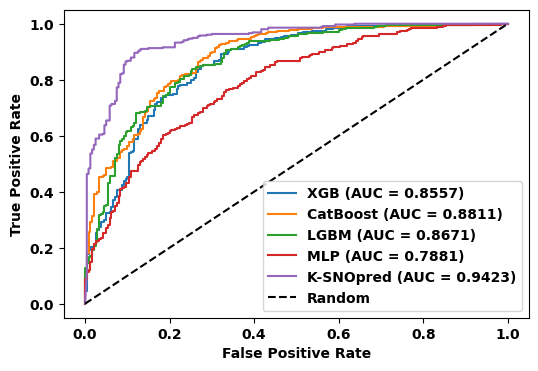

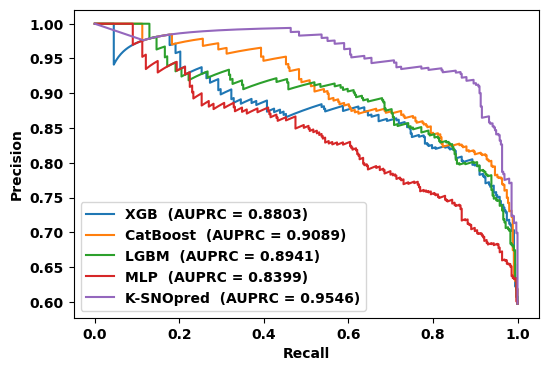

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Set font properties
rc('font', weight='bold')
rc('font', family='sans-serif')
rc('font', size=10)

# Define the classifiers and their predictions
classifiers = [xgb_model, catboost_model,lgbm_model, mlp_model, knn_model]
classifier_labels = ['XGB', 'CatBoost','LGBM','MLP','K-SNOpred']
predictions_test = []

# Collect predictions for the test set
for clf in classifiers:
    # Fit the classifier before making predictions
    clf.fit(X_train, y_train)

    if hasattr(clf, 'predict_proba'):
        pred_prob_test = clf.predict_proba(X_test)[:, 1]
    else:
        pred_prob_test = clf.predict(X_test)

    predictions_test.append(pred_prob_test)

# Plot ROC curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    fpr_test, tpr_test, _ = roc_curve(y_test, predictions_test[i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=f'{classifier_labels[i]} (AUC = {roc_auc_test:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')

plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.legend()
plt.show()

# Plot Precision-Recall curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    precision_test, recall_test, _ = precision_recall_curve(y_test, predictions_test[i])
    auprc_test = average_precision_score(y_test, predictions_test[i])
    plt.plot(recall_test, precision_test, label=f'{classifier_labels[i]}  (AUPRC = {auprc_test:.4f})')


plt.xlabel('Recall',weight='bold')
plt.ylabel('Precision',weight='bold')
plt.legend()
plt.show()


# REC_FASTTEXT

# CV

## xgb

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_REC.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=1000, max_depth=1000, learning_rate=0.1 )

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.7447, Specificity=0.4470, AUC=0.6312, MCC=0.2010, Accuracy=0.6131
Fold 10: Sensitivity=0.7890, Specificity=0.4118, AUC=0.6188, MCC=0.2172, Accuracy=0.6064
Fold 10: Sensitivity=0.7712, Specificity=0.4209, AUC=0.6253, MCC=0.2056, Accuracy=0.6080
Fold 10: Sensitivity=0.7469, Specificity=0.4322, AUC=0.6157, MCC=0.1891, Accuracy=0.6030
Fold 10: Sensitivity=0.7122, Specificity=0.3808, AUC=0.5699, MCC=0.0981, Accuracy=0.5678
Fold 10: Sensitivity=0.7739, Specificity=0.3852, AUC=0.6184, MCC=0.1731, Accuracy=0.5896
Fold 10: Sensitivity=0.7390, Specificity=0.4062, AUC=0.5778, MCC=0.1537, Accuracy=0.5963
Fold 10: Sensitivity=0.8007, Specificity=0.4034, AUC=0.6248, MCC=0.2229, Accuracy=0.6074
Fold 10: Sensitivity=0.7404, Specificity=0.3619, AUC=0.5931, MCC=0.1102, Accuracy=0.5772
Fold 10: Sensitivity=0.7022, Specificity=0.4083, AUC=0.5964, MCC=0.1143, Accuracy=0.5839

Average Sensitivity: 0.7520
Average Specificity: 0.4058
Average AUC: 0.6071
Average MCC: 0.1685
Average Accur

## CNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_REC.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)



# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build the 1D CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test data
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, y_pred_probs)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {np.mean(all_sensitivity):.4f}')
print(f'Average Specificity: {np.mean(all_specificity):.4f}')
print(f'Average AUC: {np.mean(all_auc):.4f}')
print(f'Average MCC: {np.mean(all_mcc):.4f}')
print(f'Average Accuracy: {np.mean(all_accuracy):.4f}')


19/19 [==============================] - 0s 6ms/step
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5000, MCC=0.0000, Accuracy=0.5578
19/19 [==============================] - 0s 7ms/step
Fold 10: Sensitivity=0.6266, Specificity=0.4567, AUC=0.5397, MCC=0.0846, Accuracy=0.5444
19/19 [==============================] - 0s 7ms/step
Fold 10: Sensitivity=0.7210, Specificity=0.3705, AUC=0.5822, MCC=0.0977, Accuracy=0.5578
19/19 [==============================] - 0s 4ms/step
Fold 10: Sensitivity=0.5463, Specificity=0.5531, AUC=0.5766, MCC=0.0990, Accuracy=0.5494
19/19 [==============================] - 0s 5ms/step
Fold 10: Sensitivity=0.5727, Specificity=0.4769, AUC=0.5248, MCC=0.0495, Accuracy=0.5310
19/19 [==============================] - 0s 11ms/step
Fold 10: Sensitivity=0.7580, Specificity=0.2862, AUC=0.5606, MCC=0.0501, Accuracy=0.5343
19/19 [==============================] - 0s 5ms/step
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5073, MCC=0.0000, Accuracy=0.5712
19/19

## EX

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_REC.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
ex_model = ExtraTreesClassifier()

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    ex_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ex_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, ex_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.8018, Specificity=0.3144, AUC=0.5857, MCC=0.1333, Accuracy=0.5863
Fold 10: Sensitivity=0.8344, Specificity=0.2491, AUC=0.5886, MCC=0.1032, Accuracy=0.5511
Fold 10: Sensitivity=0.8307, Specificity=0.2662, AUC=0.5670, MCC=0.1178, Accuracy=0.5678
Fold 10: Sensitivity=0.7901, Specificity=0.2747, AUC=0.5818, MCC=0.0757, Accuracy=0.5544
Fold 10: Sensitivity=0.7893, Specificity=0.3115, AUC=0.5922, MCC=0.1148, Accuracy=0.5812
Fold 10: Sensitivity=0.7866, Specificity=0.2792, AUC=0.5305, MCC=0.0764, Accuracy=0.5461
Fold 10: Sensitivity=0.7390, Specificity=0.2969, AUC=0.5523, MCC=0.0397, Accuracy=0.5494
Fold 10: Sensitivity=0.8170, Specificity=0.2345, AUC=0.5598, MCC=0.0634, Accuracy=0.5336
Fold 10: Sensitivity=0.7965, Specificity=0.3580, AUC=0.6060, MCC=0.1723, Accuracy=0.6074
Fold 10: Sensitivity=0.7669, Specificity=0.3542, AUC=0.5758, MCC=0.1319, Accuracy=0.6007

Average Sensitivity: 0.7952
Average Specificity: 0.2939
Average AUC: 0.5740
Average MCC: 0.1029
Average Accur

## MLP

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_REC.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
mlp_model = MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100,alpha=0.0001,learning_rate='invscaling')

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    mlp_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = mlp_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5311, MCC=0.0000, Accuracy=0.5578
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5217, MCC=0.0000, Accuracy=0.5159
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5153, MCC=0.0000, Accuracy=0.5343
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5258, MCC=0.0000, Accuracy=0.5427
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.4993, MCC=0.0000, Accuracy=0.5645
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5011, MCC=0.0000, Accuracy=0.5260
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5036, MCC=0.0000, Accuracy=0.5712
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.4807, MCC=0.0000, Accuracy=0.5134
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5019, MCC=0.0000, Accuracy=0.5688
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.4943, MCC=0.0000, Accuracy=0.5973

Average Sensitivity: 1.0000
Average Specificity: 0.0000
Average AUC: 0.5075
Average MCC: 0.0000
Average Accur

## AdaBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_REC.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators= 100)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    adaboost_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = adaboost_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, adaboost_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.6216, Specificity=0.4280, AUC=0.5405, MCC=0.0503, Accuracy=0.5360
Fold 10: Sensitivity=0.6688, Specificity=0.3806, AUC=0.5233, MCC=0.0516, Accuracy=0.5293
Fold 10: Sensitivity=0.6144, Specificity=0.4388, AUC=0.5387, MCC=0.0540, Accuracy=0.5327
Fold 10: Sensitivity=0.6543, Specificity=0.4139, AUC=0.5313, MCC=0.0702, Accuracy=0.5444
Fold 10: Sensitivity=0.5994, Specificity=0.4385, AUC=0.5232, MCC=0.0381, Accuracy=0.5293
Fold 10: Sensitivity=0.6306, Specificity=0.4523, AUC=0.5469, MCC=0.0842, Accuracy=0.5461
Fold 10: Sensitivity=0.5718, Specificity=0.3984, AUC=0.5061, MCC=-0.0298, Accuracy=0.4975
Fold 10: Sensitivity=0.6634, Specificity=0.3931, AUC=0.5475, MCC=0.0587, Accuracy=0.5319
Fold 10: Sensitivity=0.5900, Specificity=0.3658, AUC=0.4805, MCC=-0.0449, Accuracy=0.4933
Fold 10: Sensitivity=0.5899, Specificity=0.4292, AUC=0.5230, MCC=0.0189, Accuracy=0.5252

Average Sensitivity: 0.6204
Average Specificity: 0.4139
Average AUC: 0.5261
Average MCC: 0.0351
Average Acc

## LGBM

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_REC.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
lgbm_model = LGBMClassifier(num_leaves=150, max_depth=1000, learning_rate=0.1, n_estimators=1000)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    lgbm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lgbm_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lSA-rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
lgbm_model = LGBMClassifier(num_leaves=150, max_depth=1000, learning_rate=0.1, n_estimators=1000)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    lgbm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lgbm_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_REC.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
knn_model = KNeighborsClassifier(n_neighbors=10,metric='manhattan',weights='distance',algorithm="kd_tree")

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.5586, Specificity=0.6364, AUC=0.6401, MCC=0.1939, Accuracy=0.5930
Fold 10: Sensitivity=0.6136, Specificity=0.5640, AUC=0.6319, MCC=0.1778, Accuracy=0.5896
Fold 10: Sensitivity=0.6489, Specificity=0.5576, AUC=0.6274, MCC=0.2071, Accuracy=0.6064
Fold 10: Sensitivity=0.5648, Specificity=0.5604, AUC=0.5952, MCC=0.1248, Accuracy=0.5628
Fold 10: Sensitivity=0.5994, Specificity=0.5962, AUC=0.6328, MCC=0.1940, Accuracy=0.5980
Fold 10: Sensitivity=0.6178, Specificity=0.6254, AUC=0.6461, MCC=0.2430, Accuracy=0.6214
Fold 10: Sensitivity=0.5953, Specificity=0.6367, AUC=0.6444, MCC=0.2297, Accuracy=0.6131
Fold 10: Sensitivity=0.6111, Specificity=0.5862, AUC=0.6171, MCC=0.1973, Accuracy=0.5990
Fold 10: Sensitivity=0.5634, Specificity=0.5798, AUC=0.6191, MCC=0.1418, Accuracy=0.5705
Fold 10: Sensitivity=0.6433, Specificity=0.6083, AUC=0.6548, MCC=0.2477, Accuracy=0.6292

Average Sensitivity: 0.6016
Average Specificity: 0.5951
Average AUC: 0.6309
Average MCC: 0.1957
Average Accur

## catboost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_REC.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss', eval_metric='AUC', random_seed=42)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

    # Make predictions on the test data
    y_pred = catboost_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.8108, Specificity=0.3485, AUC=0.6367, MCC=0.1804, Accuracy=0.6064
Fold 10: Sensitivity=0.8442, Specificity=0.2837, AUC=0.5801, MCC=0.1549, Accuracy=0.5729
Fold 10: Sensitivity=0.8213, Specificity=0.3345, AUC=0.6051, MCC=0.1792, Accuracy=0.5946
Fold 10: Sensitivity=0.8179, Specificity=0.3516, AUC=0.6459, MCC=0.1927, Accuracy=0.6047
Fold 10: Sensitivity=0.7923, Specificity=0.3077, AUC=0.5606, MCC=0.1143, Accuracy=0.5812
Fold 10: Sensitivity=0.8344, Specificity=0.3039, AUC=0.5806, MCC=0.1638, Accuracy=0.5829
Fold 10: Sensitivity=0.7947, Specificity=0.3047, AUC=0.5810, MCC=0.1139, Accuracy=0.5846
Fold 10: Sensitivity=0.8268, Specificity=0.3000, AUC=0.5815, MCC=0.1495, Accuracy=0.5705
Fold 10: Sensitivity=0.7729, Specificity=0.3191, AUC=0.5709, MCC=0.1029, Accuracy=0.5772
Fold 10: Sensitivity=0.7331, Specificity=0.3542, AUC=0.5685, MCC=0.0933, Accuracy=0.5805

Average Sensitivity: 0.8048
Average Specificity: 0.3208
Average AUC: 0.5911
Average MCC: 0.1445
Average Accur

# LAZY

In [ ]:
!python -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install lazypredict

In [ ]:


import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a dataset (X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/fasttext_REC.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
#kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create a LazyClassifier
clf = LazyClassifier()

# Fit and predict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)
results_df = pd.DataFrame(models)
results_df.to_csv('a.csv', index=False)

 97%|█████████▋| 28/29 [02:12<00:04,  4.04s/it]

[LightGBM] [Info] Number of positive: 2636, number of negative: 2137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65280
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 256
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552273 -> initscore=0.209860
[LightGBM] [Info] Start training from score 0.209860


100%|██████████| 29/29 [02:17<00:00,  4.75s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.63               0.62     0.62      0.62   
NuSVC                              0.63               0.62     0.62      0.62   
KNeighborsClassifier               0.58               0.59     0.59      0.58   
SVC                                0.57               0.56     0.56      0.55   
ExtraTreesClassifier               0.56               0.54     0.54      0.53   
NearestCentroid                    0.55               0.54     0.54      0.55   
LGBMClassifier                     0.55               0.54     0.54      0.54   
XGBClassifier                      0.55               0.54     0.54      0.54   
RandomForestClassifier             0.56               0.54     0.54      0.52   
GaussianNB                         0.54               0.53     0.53      0.53   
RidgeClassifierCV           

# ROC curve and PR curve

0:	total: 613ms	remaining: 5m 5s
1:	total: 1.24s	remaining: 5m 9s
2:	total: 1.86s	remaining: 5m 7s
3:	total: 2.47s	remaining: 5m 6s
4:	total: 3.1s	remaining: 5m 6s
5:	total: 3.71s	remaining: 5m 5s
6:	total: 4.34s	remaining: 5m 5s
7:	total: 4.95s	remaining: 5m 4s
8:	total: 5.6s	remaining: 5m 5s
9:	total: 6.6s	remaining: 5m 23s
10:	total: 7.89s	remaining: 5m 50s
11:	total: 9.22s	remaining: 6m 15s
12:	total: 10.5s	remaining: 6m 33s
13:	total: 11.8s	remaining: 6m 50s
14:	total: 12.8s	remaining: 6m 53s
15:	total: 13.4s	remaining: 6m 45s
16:	total: 14s	remaining: 6m 38s
17:	total: 14.6s	remaining: 6m 31s
18:	total: 15.3s	remaining: 6m 26s
19:	total: 15.9s	remaining: 6m 21s
20:	total: 16.5s	remaining: 6m 16s
21:	total: 17.1s	remaining: 6m 12s
22:	total: 17.8s	remaining: 6m 8s
23:	total: 18.4s	remaining: 6m 4s
24:	total: 19.6s	remaining: 6m 12s
25:	total: 20.3s	remaining: 6m 9s
26:	total: 20.9s	remaining: 6m 6s
27:	total: 21.6s	remaining: 6m 4s
28:	total: 22.6s	remaining: 6m 6s
29:	total: 23.6

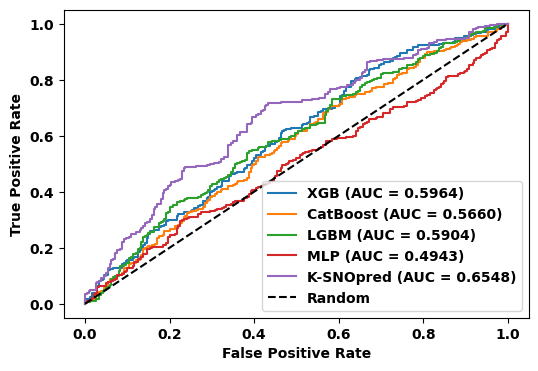

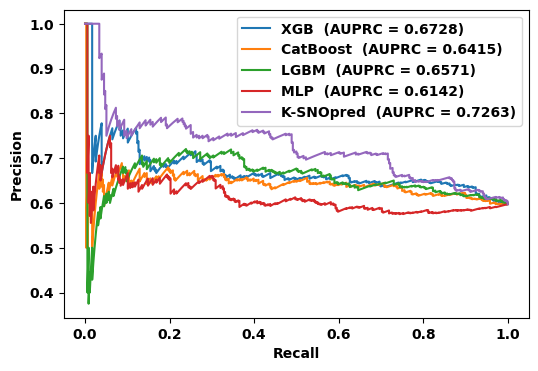

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Set font properties
rc('font', weight='bold')
rc('font', family='sans-serif')
rc('font', size=10)

# Define the classifiers and their predictions
classifiers = [xgb_model, catboost_model,lgbm_model, mlp_model, knn_model]
classifier_labels = ['XGB', 'CatBoost','LGBM','MLP','K-SNOpred']
predictions_test = []

# Collect predictions for the test set
for clf in classifiers:
    # Fit the classifier before making predictions
    clf.fit(X_train, y_train)

    if hasattr(clf, 'predict_proba'):
        pred_prob_test = clf.predict_proba(X_test)[:, 1]
    else:
        pred_prob_test = clf.predict(X_test)

    predictions_test.append(pred_prob_test)

# Plot ROC curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    fpr_test, tpr_test, _ = roc_curve(y_test, predictions_test[i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=f'{classifier_labels[i]} (AUC = {roc_auc_test:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')

plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.legend()
plt.show()

# Plot Precision-Recall curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    precision_test, recall_test, _ = precision_recall_curve(y_test, predictions_test[i])
    auprc_test = average_precision_score(y_test, predictions_test[i])
    plt.plot(recall_test, precision_test, label=f'{classifier_labels[i]}  (AUPRC = {auprc_test:.4f})')


plt.xlabel('Recall',weight='bold')
plt.ylabel('Precision',weight='bold')
plt.legend()
plt.show()


# doc 2 vec **REX** **bold text**

# CV

## xgb

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc---rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=1000, max_depth=1000, learning_rate=0.1 )

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.6877, Specificity=0.2803, AUC=0.4609, MCC=-0.0348, Accuracy=0.5075
Fold 10: Sensitivity=0.7078, Specificity=0.2837, AUC=0.5069, MCC=-0.0093, Accuracy=0.5025
Fold 10: Sensitivity=0.7210, Specificity=0.2986, AUC=0.5079, MCC=0.0215, Accuracy=0.5243
Fold 10: Sensitivity=0.6759, Specificity=0.2674, AUC=0.4337, MCC=-0.0617, Accuracy=0.4891
Fold 10: Sensitivity=0.7003, Specificity=0.3346, AUC=0.5259, MCC=0.0373, Accuracy=0.5410
Fold 10: Sensitivity=0.6975, Specificity=0.2509, AUC=0.4673, MCC=-0.0576, Accuracy=0.4858
Fold 10: Sensitivity=0.6950, Specificity=0.3359, AUC=0.5064, MCC=0.0329, Accuracy=0.5410
Fold 10: Sensitivity=0.6863, Specificity=0.2448, AUC=0.4627, MCC=-0.0767, Accuracy=0.4715
Fold 10: Sensitivity=0.6932, Specificity=0.3035, AUC=0.4866, MCC=-0.0035, Accuracy=0.5252
Fold 10: Sensitivity=0.6713, Specificity=0.3333, AUC=0.4842, MCC=0.0049, Accuracy=0.5352

Average Sensitivity: 0.6936
Average Specificity: 0.2933
Average AUC: 0.4842
Average MCC: -0.0147
Averag

## CNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc---rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)



# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build the 1D CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test data
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, y_pred_probs)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {np.mean(all_sensitivity):.4f}')
print(f'Average Specificity: {np.mean(all_specificity):.4f}')
print(f'Average AUC: {np.mean(all_auc):.4f}')
print(f'Average MCC: {np.mean(all_mcc):.4f}')
print(f'Average Accuracy: {np.mean(all_accuracy):.4f}')


19/19 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.6727, Specificity=0.3068, AUC=0.4605, MCC=-0.0219, Accuracy=0.5109
19/19 [==============================] - 0s 8ms/step
Fold 10: Sensitivity=0.8149, Specificity=0.1419, AUC=0.4751, MCC=-0.0583, Accuracy=0.4891
19/19 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.6207, Specificity=0.3885, AUC=0.4959, MCC=0.0094, Accuracy=0.5126
19/19 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.5000, Specificity=0.4615, AUC=0.4663, MCC=-0.0383, Accuracy=0.4824
19/19 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.6795, Specificity=0.3346, AUC=0.5041, MCC=0.0149, Accuracy=0.5293
19/19 [==============================] - 0s 5ms/step
Fold 10: Sensitivity=0.6306, Specificity=0.3145, AUC=0.4711, MCC=-0.0578, Accuracy=0.4807
19/19 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.6188, Specificity=0.4023, AUC=0.5280, MCC=0.0214, Accuracy=0.5260
19

## EX

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc---rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
ex_model = ExtraTreesClassifier()

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    ex_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ex_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, ex_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.7327, Specificity=0.2235, AUC=0.4710, MCC=-0.0504, Accuracy=0.5075
Fold 10: Sensitivity=0.7987, Specificity=0.1799, AUC=0.4999, MCC=-0.0272, Accuracy=0.4992
Fold 10: Sensitivity=0.7806, Specificity=0.2302, AUC=0.5198, MCC=0.0129, Accuracy=0.5243
Fold 10: Sensitivity=0.7809, Specificity=0.2234, AUC=0.5186, MCC=0.0052, Accuracy=0.5260
Fold 10: Sensitivity=0.7923, Specificity=0.2538, AUC=0.5632, MCC=0.0545, Accuracy=0.5578
Fold 10: Sensitivity=0.7994, Specificity=0.2367, AUC=0.5225, MCC=0.0437, Accuracy=0.5327
Fold 10: Sensitivity=0.7742, Specificity=0.2578, AUC=0.5102, MCC=0.0371, Accuracy=0.5528
Fold 10: Sensitivity=0.8039, Specificity=0.2172, AUC=0.5002, MCC=0.0261, Accuracy=0.5185
Fold 10: Sensitivity=0.7463, Specificity=0.2802, AUC=0.5189, MCC=0.0297, Accuracy=0.5453
Fold 10: Sensitivity=0.7500, Specificity=0.2042, AUC=0.4994, MCC=-0.0533, Accuracy=0.5302

Average Sensitivity: 0.7759
Average Specificity: 0.2307
Average AUC: 0.5124
Average MCC: 0.0078
Average Ac

## MLP

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc---rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
mlp_model = MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100,alpha=0.0001,learning_rate='invscaling')

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    mlp_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = mlp_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.7147, Specificity=0.2652, AUC=0.4900, MCC=-0.0224, Accuracy=0.5159
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5353, MCC=0.0000, Accuracy=0.5159
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5036, MCC=0.0000, Accuracy=0.5343
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5047, MCC=0.0000, Accuracy=0.5427
Fold 10: Sensitivity=0.7923, Specificity=0.2462, AUC=0.5376, MCC=0.0457, Accuracy=0.5544
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.4844, MCC=0.0000, Accuracy=0.5260
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5234, MCC=0.0000, Accuracy=0.5712
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.4928, MCC=0.0000, Accuracy=0.5134
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.4907, MCC=0.0000, Accuracy=0.5688
Fold 10: Sensitivity=1.0000, Specificity=0.0000, AUC=0.5102, MCC=0.0000, Accuracy=0.5973

Average Sensitivity: 0.9507
Average Specificity: 0.0511
Average AUC: 0.5073
Average MCC: 0.0023
Average Accu

## AdaBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc---rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators= 100)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    adaboost_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = adaboost_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, adaboost_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.5886, Specificity=0.4053, AUC=0.5121, MCC=-0.0062, Accuracy=0.5075
Fold 10: Sensitivity=0.6494, Specificity=0.3737, AUC=0.5023, MCC=0.0240, Accuracy=0.5159
Fold 10: Sensitivity=0.6677, Specificity=0.3453, AUC=0.4921, MCC=0.0137, Accuracy=0.5176
Fold 10: Sensitivity=0.6358, Specificity=0.3297, AUC=0.4796, MCC=-0.0361, Accuracy=0.4958
Fold 10: Sensitivity=0.6261, Specificity=0.4038, AUC=0.5285, MCC=0.0305, Accuracy=0.5293
Fold 10: Sensitivity=0.6210, Specificity=0.3993, AUC=0.5043, MCC=0.0208, Accuracy=0.5159
Fold 10: Sensitivity=0.6217, Specificity=0.3984, AUC=0.5341, MCC=0.0205, Accuracy=0.5260
Fold 10: Sensitivity=0.6275, Specificity=0.3897, AUC=0.4873, MCC=0.0176, Accuracy=0.5117
Fold 10: Sensitivity=0.6460, Specificity=0.3774, AUC=0.5240, MCC=0.0241, Accuracy=0.5302
Fold 10: Sensitivity=0.5758, Specificity=0.4250, AUC=0.5096, MCC=0.0008, Accuracy=0.5151

Average Sensitivity: 0.6260
Average Specificity: 0.3848
Average AUC: 0.5074
Average MCC: 0.0110
Average Acc

## LGBM

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc---rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
lgbm_model = LGBMClassifier(num_leaves=150, max_depth=1000, learning_rate=0.1, n_estimators=1000)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    lgbm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lgbm_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc---rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the XGBoost classifier
knn_model = KNeighborsClassifier(n_neighbors=10,metric='manhattan',weights='distance',algorithm="kd_tree")

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.6156, Specificity=0.4053, AUC=0.4998, MCC=0.0213, Accuracy=0.5226
Fold 10: Sensitivity=0.6526, Specificity=0.3945, AUC=0.5156, MCC=0.0487, Accuracy=0.5276
Fold 10: Sensitivity=0.6583, Specificity=0.3525, AUC=0.5022, MCC=0.0113, Accuracy=0.5159
Fold 10: Sensitivity=0.6080, Specificity=0.3626, AUC=0.4889, MCC=-0.0301, Accuracy=0.4958
Fold 10: Sensitivity=0.6261, Specificity=0.4308, AUC=0.5510, MCC=0.0576, Accuracy=0.5410
Fold 10: Sensitivity=0.5764, Specificity=0.3534, AUC=0.4817, MCC=-0.0719, Accuracy=0.4707
Fold 10: Sensitivity=0.6246, Specificity=0.3789, AUC=0.4893, MCC=0.0036, Accuracy=0.5193
Fold 10: Sensitivity=0.6242, Specificity=0.3759, AUC=0.4846, MCC=0.0000, Accuracy=0.5034
Fold 10: Sensitivity=0.6018, Specificity=0.3580, AUC=0.4675, MCC=-0.0411, Accuracy=0.4966
Fold 10: Sensitivity=0.6067, Specificity=0.3292, AUC=0.4625, MCC=-0.0652, Accuracy=0.4950

Average Sensitivity: 0.6194
Average Specificity: 0.3741
Average AUC: 0.4943
Average MCC: -0.0066
Average 

## catboost

In [ ]:
pip install catboost

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc---rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss', eval_metric='AUC', random_seed=42)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

    # Make predictions on the test data
    y_pred = catboost_model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {sum(all_sensitivity) / len(all_sensitivity):.4f}')
print(f'Average Specificity: {sum(all_specificity) / len(all_specificity):.4f}')
print(f'Average AUC: {sum(all_auc) / len(all_auc):.4f}')
print(f'Average MCC: {sum(all_mcc) / len(all_mcc):.4f}')
print(f'Average Accuracy: {sum(all_accuracy) / len(all_accuracy):.4f}')


Fold 10: Sensitivity=0.7748, Specificity=0.2803, AUC=0.5317, MCC=0.0632, Accuracy=0.5561
Fold 10: Sensitivity=0.6688, Specificity=0.3564, AUC=0.4936, MCC=0.0266, Accuracy=0.5176
Fold 10: Sensitivity=0.7931, Specificity=0.1942, AUC=0.5234, MCC=-0.0157, Accuracy=0.5142
Fold 10: Sensitivity=0.7191, Specificity=0.3297, AUC=0.5364, MCC=0.0529, Accuracy=0.5410
Fold 10: Sensitivity=0.7982, Specificity=0.2115, AUC=0.5496, MCC=0.0120, Accuracy=0.5427
Fold 10: Sensitivity=0.6624, Specificity=0.3993, AUC=0.5011, MCC=0.0639, Accuracy=0.5377
Fold 10: Sensitivity=0.7977, Specificity=0.2188, AUC=0.5336, MCC=0.0200, Accuracy=0.5494
Fold 10: Sensitivity=0.8725, Specificity=0.1793, AUC=0.5523, MCC=0.0721, Accuracy=0.5352
Fold 10: Sensitivity=0.6726, Specificity=0.3696, AUC=0.5488, MCC=0.0440, Accuracy=0.5419
Fold 10: Sensitivity=0.7388, Specificity=0.2875, AUC=0.5095, MCC=0.0290, Accuracy=0.5570

Average Sensitivity: 0.7498
Average Specificity: 0.2827
Average AUC: 0.5280
Average MCC: 0.0368
Average Accu

## LAZY

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
pip install lazypredict

In [ ]:


import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a dataset (X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc---rec.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
#kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create a LazyClassifier
clf = LazyClassifier()

# Fit and predict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)
results_df = pd.DataFrame(models)
results_df.to_csv('a.csv', index=False)

 97%|█████████▋| 28/29 [01:39<00:04,  4.64s/it]

[LightGBM] [Info] Number of positive: 2636, number of negative: 2137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32640
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552273 -> initscore=0.209860
[LightGBM] [Info] Start training from score 0.209860


100%|██████████| 29/29 [01:43<00:00,  3.57s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.53               0.52     0.52      0.52   
NuSVC                              0.53               0.52     0.52      0.52   
AdaBoostClassifier                 0.53               0.51     0.51      0.51   
BernoulliNB                        0.53               0.51     0.51      0.50   
QuadraticDiscriminantAnalysis      0.52               0.51     0.51      0.51   
ExtraTreesClassifier               0.53               0.51     0.51      0.48   
XGBClassifier                      0.51               0.51     0.51      0.51   
NearestCentroid                    0.51               0.51     0.51      0.51   
GaussianNB                         0.52               0.50     0.50      0.50   
SVC                                0.53               0.50     0.50      0.46   
CalibratedClassifierCV      

## **ROC curve **

0:	total: 322ms	remaining: 2m 40s
1:	total: 648ms	remaining: 2m 41s
2:	total: 956ms	remaining: 2m 38s
3:	total: 1.28s	remaining: 2m 38s
4:	total: 1.6s	remaining: 2m 38s
5:	total: 1.91s	remaining: 2m 37s
6:	total: 2.22s	remaining: 2m 36s
7:	total: 2.55s	remaining: 2m 37s
8:	total: 2.97s	remaining: 2m 42s
9:	total: 3.52s	remaining: 2m 52s
10:	total: 4.07s	remaining: 3m
11:	total: 4.54s	remaining: 3m 4s
12:	total: 5.11s	remaining: 3m 11s
13:	total: 5.7s	remaining: 3m 17s
14:	total: 6.23s	remaining: 3m 21s
15:	total: 6.66s	remaining: 3m 21s
16:	total: 6.97s	remaining: 3m 18s
17:	total: 7.27s	remaining: 3m 14s
18:	total: 7.59s	remaining: 3m 12s
19:	total: 7.9s	remaining: 3m 9s
20:	total: 8.22s	remaining: 3m 7s
21:	total: 8.53s	remaining: 3m 5s
22:	total: 8.85s	remaining: 3m 3s
23:	total: 9.15s	remaining: 3m 1s
24:	total: 9.46s	remaining: 2m 59s
25:	total: 9.79s	remaining: 2m 58s
26:	total: 10.1s	remaining: 2m 56s
27:	total: 10.4s	remaining: 2m 55s
28:	total: 10.7s	remaining: 2m 54s
29:	tota

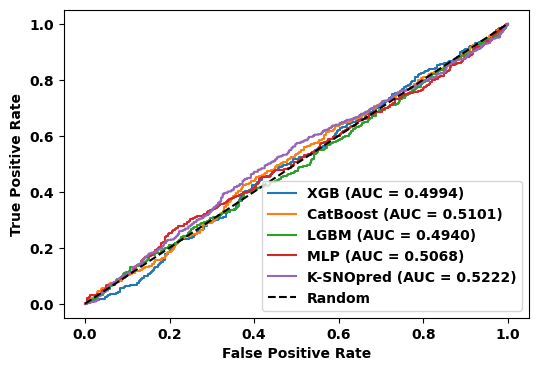

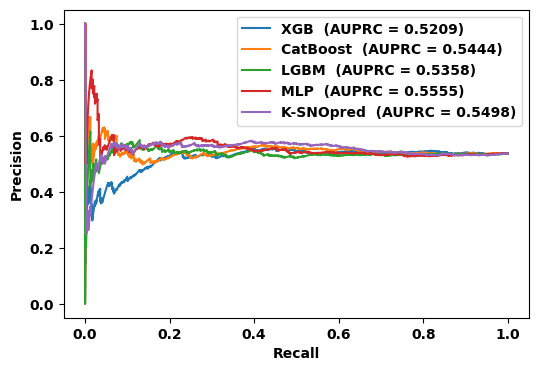

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Set font properties
rc('font', weight='bold')
rc('font', family='sans-serif')
rc('font', size=10)

# Define the classifiers and their predictions
classifiers = [xgb_model, catboost_model,lgbm_model, mlp_model, knn_model]
classifier_labels = ['XGB', 'CatBoost','LGBM','MLP','K-SNOpred']
predictions_test = []

# Collect predictions for the test set
for clf in classifiers:
    # Fit the classifier before making predictions
    clf.fit(X_train, y_train)

    if hasattr(clf, 'predict_proba'):
        pred_prob_test = clf.predict_proba(X_test)[:, 1]
    else:
        pred_prob_test = clf.predict(X_test)

    predictions_test.append(pred_prob_test)

# Plot ROC curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    fpr_test, tpr_test, _ = roc_curve(y_test, predictions_test[i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=f'{classifier_labels[i]} (AUC = {roc_auc_test:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')

plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.legend()
plt.show()

# Plot Precision-Recall curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    precision_test, recall_test, _ = precision_recall_curve(y_test, predictions_test[i])
    auprc_test = average_precision_score(y_test, predictions_test[i])
    plt.plot(recall_test, precision_test, label=f'{classifier_labels[i]}  (AUPRC = {auprc_test:.4f})')


plt.xlabel('Recall',weight='bold')
plt.ylabel('Precision',weight='bold')
plt.legend()
plt.show()


# DBSNO --

LSA

df1_DBSNODT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/doc2---dbs.csv')
df2_DBSNOLT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/lsa--dbs.csv')
df3_DBSNOFT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/Fastext_DBSNO.csv')

# CV

## xgb

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /LSA-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

xgb_model = XGBClassifier(n_estimators=1000, max_depth=1000, learning_rate=0.1)

y_pred = cross_val_predict(xgb_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(xgb_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[2882  686]
 [ 824 2433]]
Accuracy: 0.7788
MCC: 0.5562
AUC: 0.8628
Sensitivity: 0.7470
Specificity: 0.8077


## CNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /LSA-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)



# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build the 1D CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test data
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, y_pred_probs)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {np.mean(all_sensitivity):.4f}')
print(f'Average Specificity: {np.mean(all_specificity):.4f}')
print(f'Average AUC: {np.mean(all_auc):.4f}')
print(f'Average MCC: {np.mean(all_mcc):.4f}')
print(f'Average Accuracy: {np.mean(all_accuracy):.4f}')


22/22 [==============================] - 0s 5ms/step
Fold 10: Sensitivity=0.6135, Specificity=0.7339, AUC=0.7550, MCC=0.3503, Accuracy=0.6764
22/22 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.4480, Specificity=0.7478, AUC=0.6422, MCC=0.2050, Accuracy=0.5959
22/22 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.7853, Specificity=0.5481, AUC=0.7157, MCC=0.3431, Accuracy=0.6662
22/22 [==============================] - 0s 4ms/step
Fold 10: Sensitivity=0.7931, Specificity=0.3379, AUC=0.5882, MCC=0.1461, Accuracy=0.5505
22/22 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.5982, Specificity=0.6387, AUC=0.6683, MCC=0.2369, Accuracy=0.6193
22/22 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.6818, Specificity=0.6203, AUC=0.7165, MCC=0.3009, Accuracy=0.6481
22/22 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.7643, Specificity=0.5679, AUC=0.7188, MCC=0.3361, Accuracy=0.6584
22/22 

## EX

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /LSA-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

ex_model = ExtraTreesClassifier()

y_pred = cross_val_predict(ex_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(ex_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


## MLP

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /LSA-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

mlp_model = MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100,alpha=0.0001,learning_rate='invscaling')

y_pred = cross_val_predict(mlp_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(mlp_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Confusion Matrix:
[[2606  962]
 [ 995 2262]]
Accuracy: 0.7133
MCC: 0.4251
AUC: 0.7845
Sensitivity: 0.6945
Specificity: 0.7304


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## AdaBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /LSA-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

adaboost_model = AdaBoostClassifier(n_estimators= 100)

y_pred = cross_val_predict(adaboost_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(adaboost_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[2243 1325]
 [1592 1665]]
Accuracy: 0.5726
MCC: 0.1408
AUC: 0.6038
Sensitivity: 0.5112
Specificity: 0.6286


## LGBM

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /LSA-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

lgbm_model = LGBMClassifier(num_leaves=150, max_depth=1000, learning_rate=0.1, n_estimators=1000)

y_pred = cross_val_predict(lgbm_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(lgbm_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /LSA-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

knn_model = KNeighborsClassifier(n_neighbors=10,metric='manhattan',weights='distance',algorithm="kd_tree")

y_pred = cross_val_predict(knn_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(knn_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

#Sensitivity, specificity, AUC, MCC, and accuracy
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[3338  230]
 [ 619 2638]]
Accuracy: 0.8756
MCC: 0.7544
AUC: 0.9506
Sensitivity: 0.8160
Specificity: 0.9076


# TEST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /LSA-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the KNeighborsClassifier
knn_modelT = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance', algorithm="kd_tree")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,shuffle=True)

# Fit the model on the training data
knn_modelT.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_modelT.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True positive, true negative, false positive, false negative
tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

# Sensitivity, specificity, AUC, MCC, and accuracy
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc = roc_auc_score(y_test, knn_modelT.predict_proba(X_test)[:, 1])
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the metrics for the single split
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'AUC: {auc:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'Accuracy: {accuracy:.4f}')


Sensitivity: 0.8160
Specificity: 0.9076
AUC: 0.9487
MCC: 0.7284
Accuracy: 0.8638


## catboost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict
from catboost import CatBoostClassifier

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /LSA-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

catboost_model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss', eval_metric='AUC', random_seed=42)

y_pred = cross_val_predict(catboost_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(catboost_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Streaming output truncated to the last 5000 lines.
8:	total: 2.35s	remaining: 2m 8s
9:	total: 2.6s	remaining: 2m 7s
10:	total: 2.85s	remaining: 2m 6s
11:	total: 3.11s	remaining: 2m 6s
12:	total: 3.36s	remaining: 2m 6s
13:	total: 3.62s	remaining: 2m 5s
14:	total: 3.87s	remaining: 2m 5s
15:	total: 4.11s	remaining: 2m 4s
16:	total: 4.36s	remaining: 2m 3s
17:	total: 4.62s	remaining: 2m 3s
18:	total: 4.87s	remaining: 2m 3s
19:	total: 5.12s	remaining: 2m 2s
20:	total: 5.36s	remaining: 2m 2s
21:	total: 5.62s	remaining: 2m 2s
22:	total: 5.87s	remaining: 2m 1s
23:	total: 6.13s	remaining: 2m 1s
24:	total: 6.37s	remaining: 2m 1s
25:	total: 6.64s	remaining: 2m 1s
26:	total: 6.89s	remaining: 2m
27:	total: 7.13s	remaining: 2m
28:	total: 7.4s	remaining: 2m
29:	total: 7.66s	remaining: 2m
30:	total: 7.91s	remaining: 1m 59s
31:	total: 8.16s	remaining: 1m 59s
32:	total: 8.4s	remaining: 1m 58s
33:	total: 8.66s	remaining: 1m 58s
34:	total: 8.92s	remaining: 1m 58s
35:	total: 9.17s	remaining: 1m 58s
36:	tota

## LAZY

In [ ]:
!python -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install lazypredict

In [ ]:


import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a dataset (X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /LSA-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
#kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create a LazyClassifier
clf = LazyClassifier()

# Fit and predict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)
results_df = pd.DataFrame(models)
results_df.to_csv('a.csv', index=False)

 97%|█████████▋| 28/29 [02:01<00:04,  4.31s/it]

[LightGBM] [Info] Number of positive: 2586, number of negative: 2874
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 5460, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473626 -> initscore=-0.105593
[LightGBM] [Info] Start training from score -0.105593


100%|██████████| 29/29 [02:04<00:00,  4.30s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.86               0.85     0.85      0.85   
LGBMClassifier                     0.70               0.70     0.70      0.70   
XGBClassifier                      0.70               0.70     0.70      0.70   
NuSVC                              0.67               0.67     0.67      0.67   
BaggingClassifier                  0.65               0.65     0.65      0.65   
DecisionTreeClassifier             0.64               0.64     0.64      0.64   
ExtraTreesClassifier               0.64               0.63     0.63      0.63   
RandomForestClassifier             0.63               0.63     0.63      0.62   
AdaBoostClassifier                 0.59               0.59     0.59      0.58   
CalibratedClassifierCV             0.56               0.55     0.55      0.53   
SVC                         

## **ROC curve **

0:	total: 252ms	remaining: 2m 5s
1:	total: 523ms	remaining: 2m 10s
2:	total: 777ms	remaining: 2m 8s
3:	total: 1.02s	remaining: 2m 7s
4:	total: 1.27s	remaining: 2m 5s
5:	total: 1.54s	remaining: 2m 6s
6:	total: 1.78s	remaining: 2m 5s
7:	total: 2.03s	remaining: 2m 4s
8:	total: 2.28s	remaining: 2m 4s
9:	total: 2.57s	remaining: 2m 6s
10:	total: 2.96s	remaining: 2m 11s
11:	total: 3.42s	remaining: 2m 19s
12:	total: 3.9s	remaining: 2m 26s
13:	total: 4.33s	remaining: 2m 30s
14:	total: 4.82s	remaining: 2m 35s
15:	total: 5.26s	remaining: 2m 39s
16:	total: 5.72s	remaining: 2m 42s
17:	total: 6.14s	remaining: 2m 44s
18:	total: 6.51s	remaining: 2m 44s
19:	total: 6.77s	remaining: 2m 42s
20:	total: 7.02s	remaining: 2m 40s
21:	total: 7.27s	remaining: 2m 37s
22:	total: 7.52s	remaining: 2m 35s
23:	total: 7.77s	remaining: 2m 34s
24:	total: 8.02s	remaining: 2m 32s
25:	total: 8.27s	remaining: 2m 30s
26:	total: 8.52s	remaining: 2m 29s
27:	total: 8.77s	remaining: 2m 27s
28:	total: 9.03s	remaining: 2m 26s
29:	t

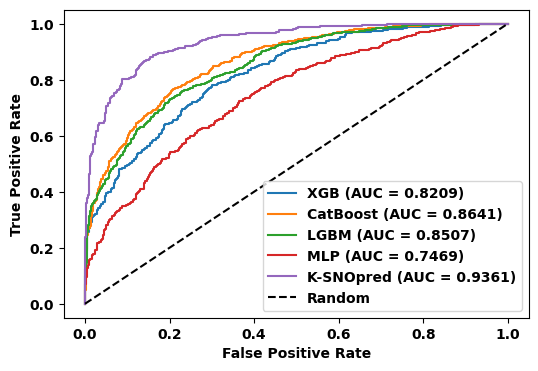

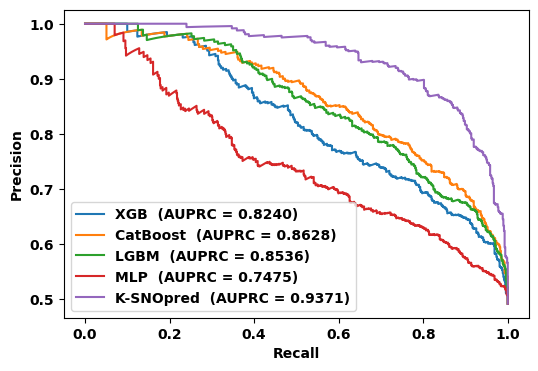

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Set font properties
rc('font', weight='bold')
rc('font', family='sans-serif')
rc('font', size=10)

# Define the classifiers and their predictions
classifiers = [xgb_model, catboost_model,lgbm_model, mlp_model, knn_model]
classifier_labels = ['XGB', 'CatBoost','LGBM','MLP','K-SNOpred']
predictions_test = []

# Collect predictions for the test set
for clf in classifiers:
    # Fit the classifier before making predictions
    clf.fit(X_train, y_train)

    if hasattr(clf, 'predict_proba'):
        pred_prob_test = clf.predict_proba(X_test)[:, 1]
    else:
        pred_prob_test = clf.predict(X_test)

    predictions_test.append(pred_prob_test)

# Plot ROC curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    fpr_test, tpr_test, _ = roc_curve(y_test, predictions_test[i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=f'{classifier_labels[i]} (AUC = {roc_auc_test:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')

plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.legend()
plt.show()

# Plot Precision-Recall curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    precision_test, recall_test, _ = precision_recall_curve(y_test, predictions_test[i])
    auprc_test = average_precision_score(y_test, predictions_test[i])
    plt.plot(recall_test, precision_test, label=f'{classifier_labels[i]}  (AUPRC = {auprc_test:.4f})')


plt.xlabel('Recall',weight='bold')
plt.ylabel('Precision',weight='bold')
plt.legend()
plt.show()


# DBSNO FSTtext

# CV

## xgb

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /Fast-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

xgb_model = XGBClassifier(n_estimators=1000, max_depth=1000, learning_rate=0.1)

y_pred = cross_val_predict(xgb_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(xgb_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[2172 1396]
 [1922 1335]]
Accuracy: 0.5138
MCC: 0.0190
AUC: 0.4946
Sensitivity: 0.4099
Specificity: 0.6087


## CNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /Fast-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)



# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build the 1D CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test data
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, y_pred_probs)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {np.mean(all_sensitivity):.4f}')
print(f'Average Specificity: {np.mean(all_specificity):.4f}')
print(f'Average AUC: {np.mean(all_auc):.4f}')
print(f'Average MCC: {np.mean(all_mcc):.4f}')
print(f'Average Accuracy: {np.mean(all_accuracy):.4f}')


22/22 [==============================] - 0s 5ms/step
Fold 10: Sensitivity=0.0031, Specificity=0.9972, AUC=0.5029, MCC=0.0025, Accuracy=0.5227
22/22 [==============================] - 0s 4ms/step
Fold 10: Sensitivity=0.0000, Specificity=1.0000, AUC=0.4955, MCC=0.0000, Accuracy=0.4934
22/22 [==============================] - 0s 4ms/step
Fold 10: Sensitivity=0.0000, Specificity=1.0000, AUC=0.4956, MCC=0.0000, Accuracy=0.5022
22/22 [==============================] - 0s 4ms/step
Fold 10: Sensitivity=0.0000, Specificity=1.0000, AUC=0.5000, MCC=0.0000, Accuracy=0.5329
22/22 [==============================] - 0s 7ms/step
Fold 10: Sensitivity=0.5429, Specificity=0.4342, AUC=0.4854, MCC=-0.0230, Accuracy=0.4861
22/22 [==============================] - 0s 5ms/step
Fold 10: Sensitivity=0.5195, Specificity=0.4973, AUC=0.5163, MCC=0.0167, Accuracy=0.5073
22/22 [==============================] - 0s 4ms/step
Fold 10: Sensitivity=0.6274, Specificity=0.4103, AUC=0.5207, MCC=0.0385, Accuracy=0.5103
22/22

## EX

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /Fast-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

ex_model = ExtraTreesClassifier()

y_pred = cross_val_predict(ex_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(ex_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[2474 1094]
 [2327  930]]
Accuracy: 0.4988
MCC: -0.0230
AUC: 0.4730
Sensitivity: 0.2855
Specificity: 0.6934


## MLP

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /Fast-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

mlp_model = MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100,alpha=0.0001,learning_rate='invscaling')

y_pred = cross_val_predict(mlp_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(mlp_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[3568    0]
 [3257    0]]
Accuracy: 0.5228
MCC: 0.0000
AUC: 0.4786
Sensitivity: 0.0000
Specificity: 1.0000


## AdaBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /Fast-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

adaboost_model = AdaBoostClassifier(n_estimators= 100)

y_pred = cross_val_predict(adaboost_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(adaboost_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[2060 1508]
 [1794 1463]]
Accuracy: 0.5162
MCC: 0.0267
AUC: 0.5123
Sensitivity: 0.4492
Specificity: 0.5774


## LGBM

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /Fast-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

lgbm_model = LGBMClassifier(num_leaves=150, max_depth=1000, learning_rate=0.1, n_estimators=1000)

y_pred = cross_val_predict(lgbm_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(lgbm_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /Fast-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

knn_model = KNeighborsClassifier(n_neighbors=10,metric='manhattan',weights='distance',algorithm="kd_tree")

y_pred = cross_val_predict(knn_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(knn_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

#Sensitivity, specificity, AUC, MCC, and accuracy
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[2113 1455]
 [1925 1332]]
Accuracy: 0.5048
MCC: 0.0012
AUC: 0.4992
Sensitivity: 0.7192
Specificity: 0.6575


## TEST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /Fast-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the KNeighborsClassifier
knn_modelT = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance', algorithm="kd_tree")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,shuffle=True)

# Fit the model on the training data
knn_modelT.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_modelT.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True positive, true negative, false positive, false negative
tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

# Sensitivity, specificity, AUC, MCC, and accuracy
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc = roc_auc_score(y_test, knn_modelT.predict_proba(X_test)[:, 1])
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the metrics for the single split
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'AUC: {auc:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'Accuracy: {accuracy:.4f}')


Sensitivity: 0.4018
Specificity: 0.6190
AUC: 0.4952
MCC: 0.0214
Accuracy: 0.5154


## catboost

In [ ]:
pip install catboost

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict
from catboost import CatBoostClassifier

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /Fast-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

catboost_model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss', eval_metric='AUC', random_seed=42)

y_pred = cross_val_predict(catboost_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(catboost_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Streaming output truncated to the last 5000 lines.
8:	total: 7.84s	remaining: 7m 7s
9:	total: 8.49s	remaining: 6m 56s
10:	total: 9.19s	remaining: 6m 48s
11:	total: 9.89s	remaining: 6m 42s
12:	total: 10.6s	remaining: 6m 35s
13:	total: 11.2s	remaining: 6m 29s
14:	total: 11.9s	remaining: 6m 24s
15:	total: 12.6s	remaining: 6m 20s
16:	total: 13.3s	remaining: 6m 16s
17:	total: 13.9s	remaining: 6m 13s
18:	total: 14.6s	remaining: 6m 9s
19:	total: 15.3s	remaining: 6m 6s
20:	total: 15.9s	remaining: 6m 3s
21:	total: 17s	remaining: 6m 9s
22:	total: 18.2s	remaining: 6m 16s
23:	total: 19.4s	remaining: 6m 23s
24:	total: 20.4s	remaining: 6m 27s
25:	total: 21s	remaining: 6m 23s
26:	total: 21.7s	remaining: 6m 20s
27:	total: 22.4s	remaining: 6m 17s
28:	total: 23s	remaining: 6m 14s
29:	total: 23.7s	remaining: 6m 11s
30:	total: 24.4s	remaining: 6m 8s
31:	total: 25s	remaining: 6m 5s
32:	total: 25.7s	remaining: 6m 3s
33:	total: 26.3s	remaining: 6m 1s
34:	total: 27s	remaining: 5m 59s
35:	total: 27.7s	remainin

## LAZY

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
pip install lazypredict

In [ ]:


import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a dataset (X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /Fast-DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
#kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create a LazyClassifier
clf = LazyClassifier()

# Fit and predict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)
results_df = pd.DataFrame(models)
results_df.to_csv('a.csv', index=False)

  3%|▎         | 1/29 [00:11<05:32, 11.87s/it]

## **ROC curve **

0:	total: 702ms	remaining: 5m 50s
1:	total: 1.36s	remaining: 5m 37s
2:	total: 2.04s	remaining: 5m 37s
3:	total: 2.71s	remaining: 5m 36s
4:	total: 3.38s	remaining: 5m 34s
5:	total: 4.05s	remaining: 5m 33s
6:	total: 4.71s	remaining: 5m 31s
7:	total: 5.5s	remaining: 5m 38s
8:	total: 6.69s	remaining: 6m 5s
9:	total: 7.87s	remaining: 6m 25s
10:	total: 9.04s	remaining: 6m 41s
11:	total: 9.73s	remaining: 6m 35s
12:	total: 10.4s	remaining: 6m 29s
13:	total: 11.1s	remaining: 6m 24s
14:	total: 11.7s	remaining: 6m 19s
15:	total: 12.4s	remaining: 6m 16s
16:	total: 13.1s	remaining: 6m 12s
17:	total: 13.8s	remaining: 6m 8s
18:	total: 14.4s	remaining: 6m 5s
19:	total: 15.1s	remaining: 6m 3s
20:	total: 15.8s	remaining: 6m
21:	total: 16.5s	remaining: 5m 58s
22:	total: 17.2s	remaining: 5m 55s
23:	total: 17.8s	remaining: 5m 53s
24:	total: 18.5s	remaining: 5m 51s
25:	total: 19.2s	remaining: 5m 49s
26:	total: 20.4s	remaining: 5m 56s
27:	total: 21.5s	remaining: 6m 2s
28:	total: 22.7s	remaining: 6m 8s
29:	to

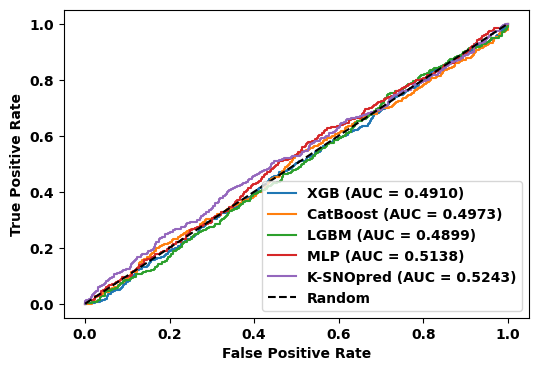

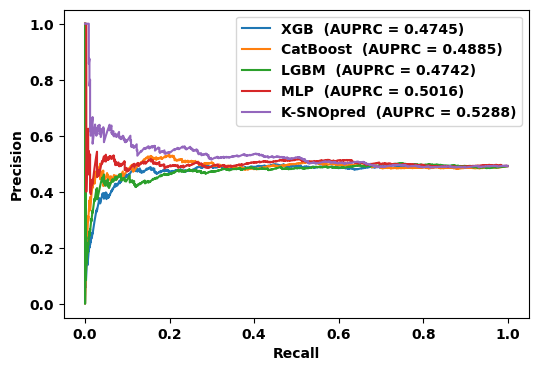

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Set font properties
rc('font', weight='bold')
rc('font', family='sans-serif')
rc('font', size=10)

# Define the classifiers and their predictions
classifiers = [xgb_model, catboost_model,lgbm_model, mlp_model, knn_model]
classifier_labels = ['XGB', 'CatBoost','LGBM','MLP','K-SNOpred']
predictions_test = []

# Collect predictions for the test set
for clf in classifiers:
    # Fit the classifier before making predictions
    clf.fit(X_train, y_train)

    if hasattr(clf, 'predict_proba'):
        pred_prob_test = clf.predict_proba(X_test)[:, 1]
    else:
        pred_prob_test = clf.predict(X_test)

    predictions_test.append(pred_prob_test)

# Plot ROC curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    fpr_test, tpr_test, _ = roc_curve(y_test, predictions_test[i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=f'{classifier_labels[i]} (AUC = {roc_auc_test:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')

plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.legend()
plt.show()

# Plot Precision-Recall curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    precision_test, recall_test, _ = precision_recall_curve(y_test, predictions_test[i])
    auprc_test = average_precision_score(y_test, predictions_test[i])
    plt.plot(recall_test, precision_test, label=f'{classifier_labels[i]}  (AUPRC = {auprc_test:.4f})')


plt.xlabel('Recall',weight='bold')
plt.ylabel('Precision',weight='bold')
plt.legend()
plt.show()


# DBSNO- DOC2vec

# CV

## xgb

In [5]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /d2V_DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

xgb_model = XGBClassifier(n_estimators=1000, max_depth=1000, learning_rate=0.1)

y_pred = cross_val_predict(xgb_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(xgb_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[2080 1488]
 [1994 1263]]
Accuracy: 0.4898
MCC: -0.0298
AUC: 0.4742
Sensitivity: 0.3878
Specificity: 0.5830


## CNN

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /d2V_DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)



# Initialize the KFold with 10 folds (you can change the number of folds as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to store evaluation metrics
all_sensitivity = []
all_specificity = []
all_auc = []
all_mcc = []
all_accuracy = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build the 1D CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test data
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # True positive, true negative, false positive, false negative
    tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

    # Sensitivity, specificity, AUC, MCC, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, y_pred_probs)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append metrics to the lists
    all_sensitivity.append(sensitivity)
    all_specificity.append(specificity)
    all_auc.append(auc)
    all_mcc.append(mcc)
    all_accuracy.append(accuracy)

    # Print the metrics for each fold
    print(f'Fold {kf.get_n_splits()}: Sensitivity={sensitivity:.4f}, Specificity={specificity:.4f}, AUC={auc:.4f}, MCC={mcc:.4f}, Accuracy={accuracy:.4f}')

# Print average metrics across all folds
print(f'\nAverage Sensitivity: {np.mean(all_sensitivity):.4f}')
print(f'Average Specificity: {np.mean(all_specificity):.4f}')
print(f'Average AUC: {np.mean(all_auc):.4f}')
print(f'Average MCC: {np.mean(all_mcc):.4f}')
print(f'Average Accuracy: {np.mean(all_accuracy):.4f}')


22/22 [==============================] - 0s 4ms/step
Fold 10: Sensitivity=0.4202, Specificity=0.5882, AUC=0.4892, MCC=0.0086, Accuracy=0.5081
22/22 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.0000, Specificity=1.0000, AUC=0.4955, MCC=0.0000, Accuracy=0.4934
22/22 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.4353, Specificity=0.5598, AUC=0.5104, MCC=-0.0050, Accuracy=0.4978
22/22 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.0721, Specificity=0.9011, AUC=0.4735, MCC=-0.0476, Accuracy=0.5139
22/22 [==============================] - 0s 3ms/step
Fold 10: Sensitivity=0.4080, Specificity=0.5798, AUC=0.4952, MCC=-0.0124, Accuracy=0.4978
22/22 [==============================] - 0s 9ms/step
Fold 10: Sensitivity=0.7792, Specificity=0.2032, AUC=0.4970, MCC=-0.0214, Accuracy=0.4633
22/22 [==============================] - 0s 4ms/step
Fold 10: Sensitivity=0.7389, Specificity=0.2473, AUC=0.5070, MCC=-0.0159, Accuracy=0.4736
2

## EX

In [7]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /d2V_DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

ex_model = ExtraTreesClassifier()

y_pred = cross_val_predict(ex_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(ex_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[2418 1150]
 [2183 1074]]
Accuracy: 0.5116
MCC: 0.0079
AUC: 0.4831
Sensitivity: 0.3298
Specificity: 0.6777


## MLP

In [8]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /d2V_DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

mlp_model = MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100,alpha=0.0001,learning_rate='invscaling')

y_pred = cross_val_predict(mlp_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(mlp_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix:
[[3045  523]
 [2776  481]]
Accuracy: 0.5166
MCC: 0.0016
AUC: 0.4840
Sensitivity: 0.1477
Specificity: 0.8534


## AdaBoost

In [9]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /d2V_DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

adaboost_model = AdaBoostClassifier(n_estimators= 100)

y_pred = cross_val_predict(adaboost_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(adaboost_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[2026 1542]
 [1921 1336]]
Accuracy: 0.4926
MCC: -0.0222
AUC: 0.4757
Sensitivity: 0.4102
Specificity: 0.5678


## LGBM

In [10]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /d2V_DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

lgbm_model = LGBMClassifier(num_leaves=150, max_depth=1000, learning_rate=0.1, n_estimators=1000)

y_pred = cross_val_predict(lgbm_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(lgbm_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## KNN

In [11]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /d2V_DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

knn_model = KNeighborsClassifier(n_neighbors=10,metric='manhattan',weights='distance',algorithm="kd_tree")

y_pred = cross_val_predict(knn_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(knn_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

#Sensitivity, specificity, AUC, MCC, and accuracy
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Confusion Matrix:
[[1867 1701]
 [1780 1477]]
Accuracy: 0.4900
MCC: -0.0233
AUC: 0.4873
Sensitivity: 0.5773
Specificity: 0.3808


## TEST

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /d2V_DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

# Initialize the KNeighborsClassifier
knn_modelT = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance', algorithm="kd_tree")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,shuffle=True)

# Fit the model on the training data
knn_modelT.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_modelT.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True positive, true negative, false positive, false negative
tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]

# Sensitivity, specificity, AUC, MCC, and accuracy
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
auc = roc_auc_score(y_test, knn_modelT.predict_proba(X_test)[:, 1])
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the metrics for the single split
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'AUC: {auc:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'Accuracy: {accuracy:.4f}')


Sensitivity: 0.4387
Specificity: 0.5182
AUC: 0.4677
MCC: -0.0432
Accuracy: 0.4802


## catboost

In [13]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.8 MB/s eta 0:00:00


In [14]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict
from catboost import CatBoostClassifier

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /d2V_DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column

cv = KFold(n_splits=10, random_state=1, shuffle=True)

catboost_model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss', eval_metric='AUC', random_seed=42)

y_pred = cross_val_predict(catboost_model, X, y, cv=cv, n_jobs=-1)
y_proba = cross_val_predict(catboost_model, X, y, cv=cv, method='predict_proba')

cm1 = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
auc = roc_auc_score(y, y_proba[:, 1])

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm1.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm1}')
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'AUC: {auc:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


Streaming output truncated to the last 5000 lines.
8:	total: 2.96s	remaining: 2m 41s
9:	total: 3.3s	remaining: 2m 41s
10:	total: 3.62s	remaining: 2m 40s
11:	total: 3.94s	remaining: 2m 40s
12:	total: 4.28s	remaining: 2m 40s
13:	total: 4.59s	remaining: 2m 39s
14:	total: 4.92s	remaining: 2m 39s
15:	total: 5.26s	remaining: 2m 39s
16:	total: 5.57s	remaining: 2m 38s
17:	total: 5.9s	remaining: 2m 38s
18:	total: 6.26s	remaining: 2m 38s
19:	total: 6.58s	remaining: 2m 38s
20:	total: 6.98s	remaining: 2m 39s
21:	total: 7.58s	remaining: 2m 44s
22:	total: 8.17s	remaining: 2m 49s
23:	total: 8.74s	remaining: 2m 53s
24:	total: 9.38s	remaining: 2m 58s
25:	total: 9.99s	remaining: 3m 2s
26:	total: 10.6s	remaining: 3m 5s
27:	total: 11.1s	remaining: 3m 6s
28:	total: 11.4s	remaining: 3m 4s
29:	total: 11.7s	remaining: 3m 3s
30:	total: 12s	remaining: 3m 2s
31:	total: 12.4s	remaining: 3m
32:	total: 12.7s	remaining: 2m 59s
33:	total: 13s	remaining: 2m 58s
34:	total: 13.3s	remaining: 2m 56s
35:	total: 13.6s	remai

## LAZY

In [15]:
!python -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [16]:
pip install lazypredict

In [17]:


import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a dataset (X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Read the CSV file into a DataFrame
df1_recDT = pd.read_csv('/content/drive/MyDrive/SOC/CSV format dataset/DBSNO dataset /d2V_DBSNO.csv')

# Assuming 'Target' is the name of your target variable column
# Replace 'Target' with the actual name of your target column
X = df1_recDT.drop('Target', axis=1)  # Features (all columns except the target column)
y = df1_recDT['Target']  # Target variable column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KFold with 10 folds (you can change the number of folds as needed)
#kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create a LazyClassifier
clf = LazyClassifier()

# Fit and predict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)
results_df = pd.DataFrame(models)
results_df.to_csv('a.csv', index=False)

 97%|█████████▋| 28/29 [01:53<00:04,  4.53s/it]

[LightGBM] [Info] Number of positive: 2586, number of negative: 2874
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32640
[LightGBM] [Info] Number of data points in the train set: 5460, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473626 -> initscore=-0.105593
[LightGBM] [Info] Start training from score -0.105593


100%|██████████| 29/29 [01:58<00:00,  4.08s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.51               0.51     0.51      0.51   
NearestCentroid                    0.51               0.51     0.51      0.51   
Perceptron                         0.51               0.51     0.51      0.50   
LinearSVC                          0.50               0.50     0.50      0.49   
CalibratedClassifierCV             0.51               0.50     0.50      0.34   
DummyClassifier                    0.51               0.50     0.50      0.34   
RidgeClassifier                    0.50               0.50     0.50      0.49   
LogisticRegression                 0.50               0.50     0.50      0.49   
LinearDiscriminantAnalysis         0.50               0.50     0.50      0.49   
RidgeClassifierCV                  0.50               0.50     0.50      0.49   
SGDClassifier               

## **ROC curve **

0:	total: 601ms	remaining: 5m
1:	total: 1.1s	remaining: 4m 33s
2:	total: 1.62s	remaining: 4m 28s
3:	total: 2.14s	remaining: 4m 25s
4:	total: 2.63s	remaining: 4m 20s
5:	total: 3.13s	remaining: 4m 18s
6:	total: 3.65s	remaining: 4m 16s
7:	total: 4.14s	remaining: 4m 14s
8:	total: 4.67s	remaining: 4m 14s
9:	total: 5.16s	remaining: 4m 12s
10:	total: 5.66s	remaining: 4m 11s
11:	total: 6.36s	remaining: 4m 18s
12:	total: 7.23s	remaining: 4m 30s
13:	total: 8.15s	remaining: 4m 43s
14:	total: 9.12s	remaining: 4m 54s
15:	total: 9.97s	remaining: 5m 1s
16:	total: 10.7s	remaining: 5m 2s
17:	total: 11.2s	remaining: 4m 59s
18:	total: 11.7s	remaining: 4m 56s
19:	total: 12.2s	remaining: 4m 53s
20:	total: 12.8s	remaining: 4m 52s
21:	total: 13.3s	remaining: 4m 48s
22:	total: 13.8s	remaining: 4m 45s
23:	total: 14.2s	remaining: 4m 41s
24:	total: 14.7s	remaining: 4m 39s
25:	total: 15.2s	remaining: 4m 37s
26:	total: 15.7s	remaining: 4m 34s
27:	total: 16.2s	remaining: 4m 33s
28:	total: 16.7s	remaining: 4m 30s
29

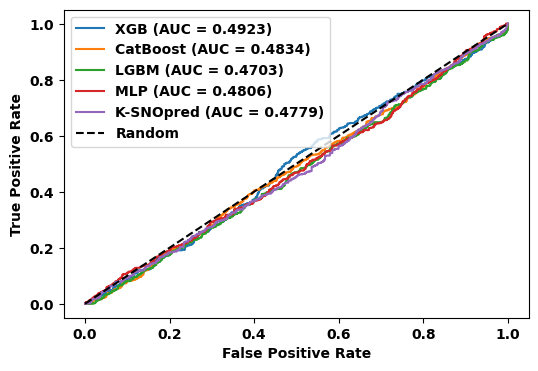

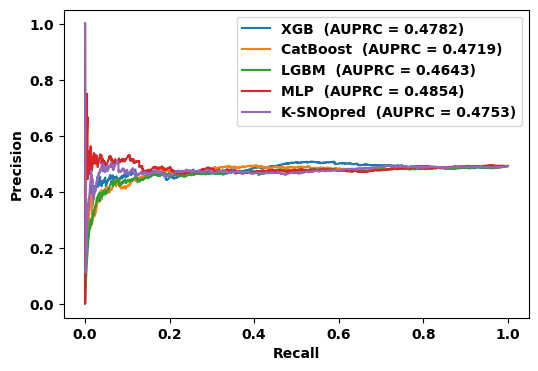

In [18]:
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Set font properties
rc('font', weight='bold')
rc('font', family='sans-serif')
rc('font', size=10)

# Define the classifiers and their predictions
classifiers = [xgb_model, catboost_model,lgbm_model, mlp_model, knn_model]
classifier_labels = ['XGB', 'CatBoost','LGBM','MLP','K-SNOpred']
predictions_test = []

# Collect predictions for the test set
for clf in classifiers:
    # Fit the classifier before making predictions
    clf.fit(X_train, y_train)

    if hasattr(clf, 'predict_proba'):
        pred_prob_test = clf.predict_proba(X_test)[:, 1]
    else:
        pred_prob_test = clf.predict(X_test)

    predictions_test.append(pred_prob_test)

# Plot ROC curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    fpr_test, tpr_test, _ = roc_curve(y_test, predictions_test[i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=f'{classifier_labels[i]} (AUC = {roc_auc_test:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')

plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.legend()
plt.show()

# Plot Precision-Recall curves for the test set
plt.figure(figsize=(6, 4))
for i in range(len(classifiers)):
    precision_test, recall_test, _ = precision_recall_curve(y_test, predictions_test[i])
    auprc_test = average_precision_score(y_test, predictions_test[i])
    plt.plot(recall_test, precision_test, label=f'{classifier_labels[i]}  (AUPRC = {auprc_test:.4f})')


plt.xlabel('Recall',weight='bold')
plt.ylabel('Precision',weight='bold')
plt.legend()
plt.show()
